In [112]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from pymongo import MongoClient
from datetime import datetime
from arctic import Arctic
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

In [113]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df

In [114]:
data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
price = clean_up_columns(data)
data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
vol = clean_up_columns(data)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [115]:
for p in price.columns:
     if p not in vol.columns:
            print p

AEX-AEX INDEX
MEXDER-10YR BOND
ME-BANK ACCEPT. 90 DAY
CBT-SOYABEAN OIL COMP.
ME-10Y CANADIAN GOVT BOND
NYM-LIGHT CRUDE OIL
ZCE-RAPESEED MEAL
DCE-PLYWOOD
DCE-EGG
BMF-US DOLLAR
CME-3 MTH EURODOLLAR COMP.
NORDPOOL-ENO QTR
CME-3 MONTH EUROYEN COMP C.01 DEA
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
EUREX-EURO BTP
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
CBT-WHEAT C.01 DEA


In [116]:
data=pd.read_csv('CurrencyMap.csv',index_col=0).T
fxmap = clean_up_columns(data).T
currency_map={'£':'GBP',
                'A$':'AUD',
                'C':'BRL',
                'C$':'CAD',
                'CH':'CNY',
                'E':'EUR',
                'K$':'HKD',
                'KW':'KRW',
                'MP':'MXN',
                'NK':'NOK',
                'PZ':'PLN',
                'R':'ZAR',
                'S$':'SGD',
                'SF':'CHF',
                'SK':'SEK',
                'SP':'USD',
                'U$':'USD',
                'UC':'Cent',
                'Y':'JPY',
                'Z$':'NZD'}
fx=pd.read_csv('currency.csv',index_col=0,parse_dates=['DATE']).resample(rule='m',how='last')
fx['USD']=1

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


In [117]:
df=pd.DataFrame()
for v in vol.columns:
    try:
        curr= currency_map[fxmap['FX'].T[v]]
        df[v]=(vol[v]*fx[curr]*price[v])
    except:
        print 'Issues: ' + v

Issues: CME-AUSTRALIAN DOLLR COMP.
Issues: CME-BRAZILIAN REAL COMP.
Issues: BMF-CORN CASH
Issues: CME-CANADIAN DOLLAR COMP.
Issues: CFFEX-CSI 300 INDEX
Issues: ZCE-RAPESEED OIL
Issues: CSCE-COTTON #2
Issues: ZCE-THERMAL COAL
Issues: DCE-POLYPROPYLENE
Issues: DCE-COKING COAL
Issues: DCE-PVC
Issues: CME-1MTH EURODOLLAR COMP
Issues: NORDPOOL-ENO YEAR
Issues: EEX-MONTHLY BASELOAD
Issues: EEX-QUARTERLY PEAK LOAD
Issues: MONEP-CAC 40 INDEX
Issues: EUREX-DAX INDEX
Issues: LIFFE-3MTH EUROSWISS
Issues: LIFFE-FTSE EUROTOP 100
Issues: EUREX-EURO STOXX 50 IND DIV
Issues: LIFFE-SHORT EUROYEN TIBOR
Issues: CBT-30 DAY FED FUNDS COMP
Issues: LIFFE-FTSE 100 INDEX
Issues: EUREX-EURO BUND
Issues: LIFFE-LONG GILT
Issues: LIFFE-FTSE 250 INDEX
Issues: LIFFE-3MTH STERLING
Issues: WSE-WIG 20
Issues: WSE-WIG 20 INDEX 20PLN
Issues: LIFFE-SHORT GILT
Issues: CSCE-COFFEE 'C'
Issues: KCBT-WHEAT
Issues: CME-LIVE CATTLE COMP.
Issues: LIFFE-COCOA
Issues: CME-LEAN HOGS COMP.
Issues: LME-ALUMINIUM
Issues: LME-COPPER
Iss

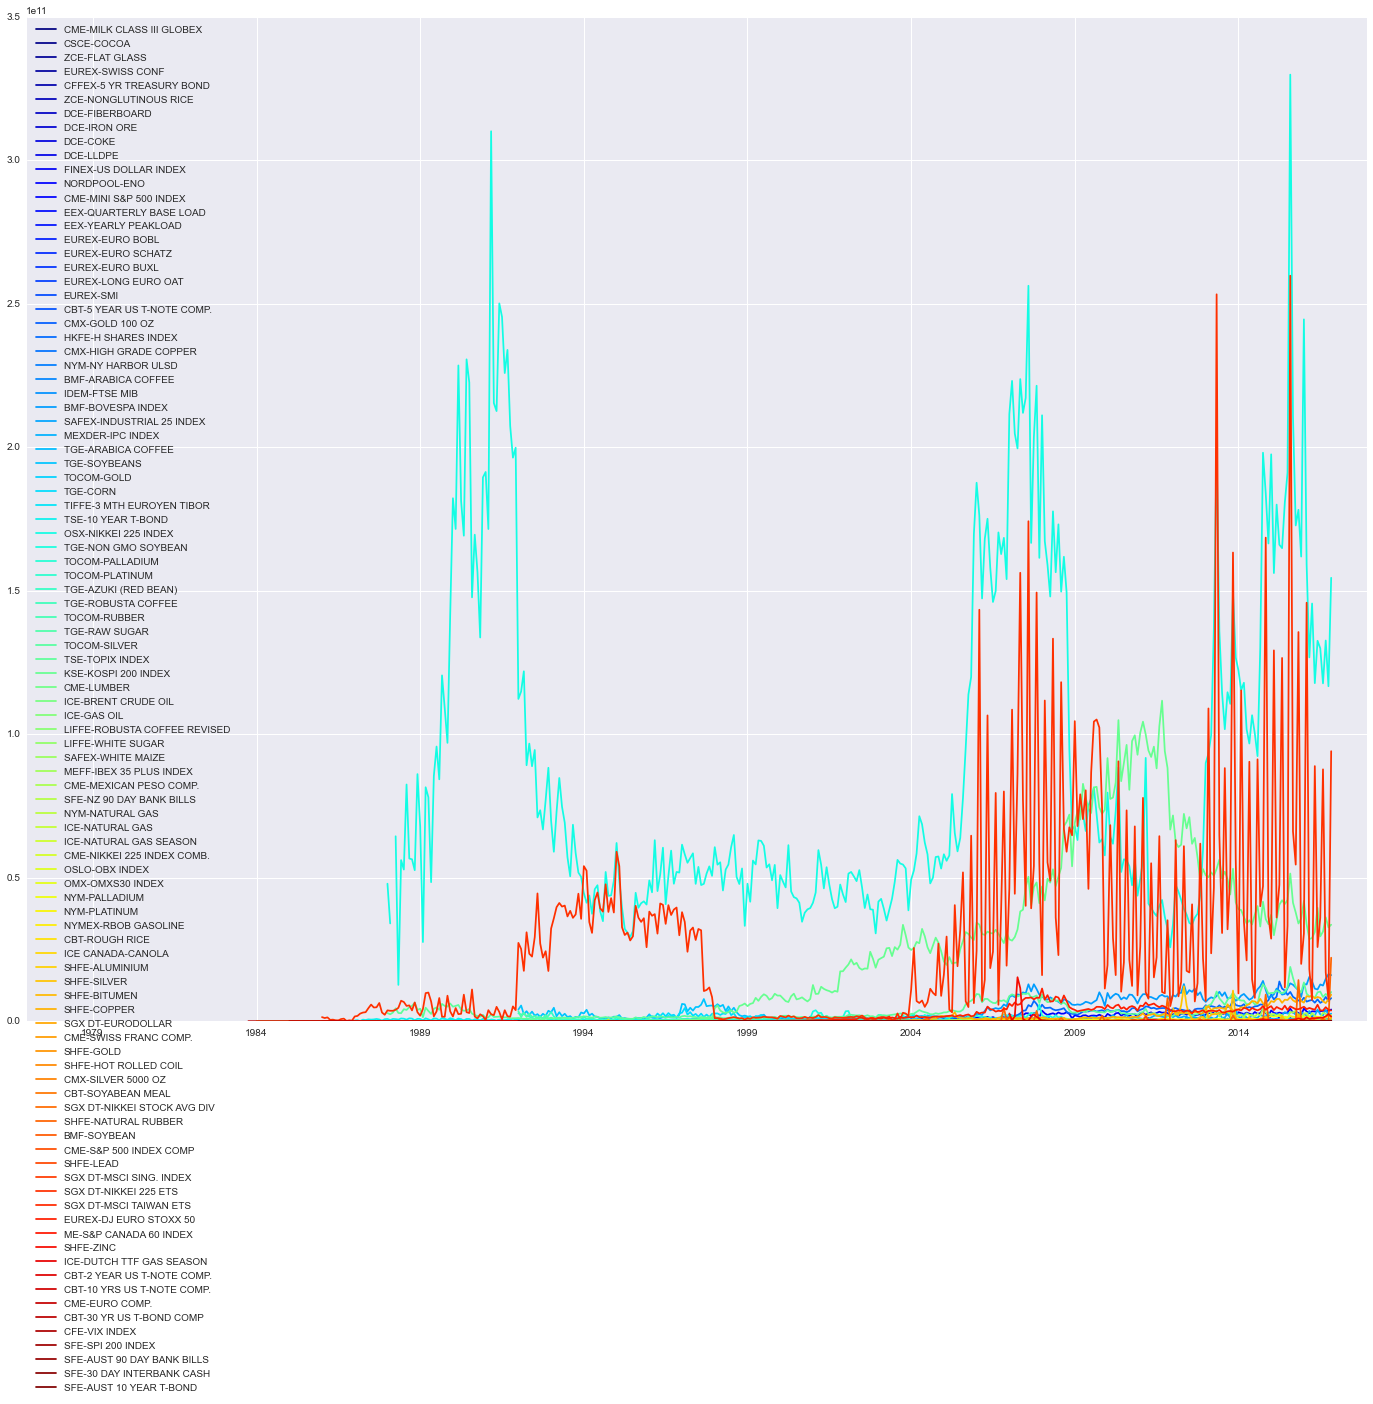

In [118]:
df.plot(colormap='jet')

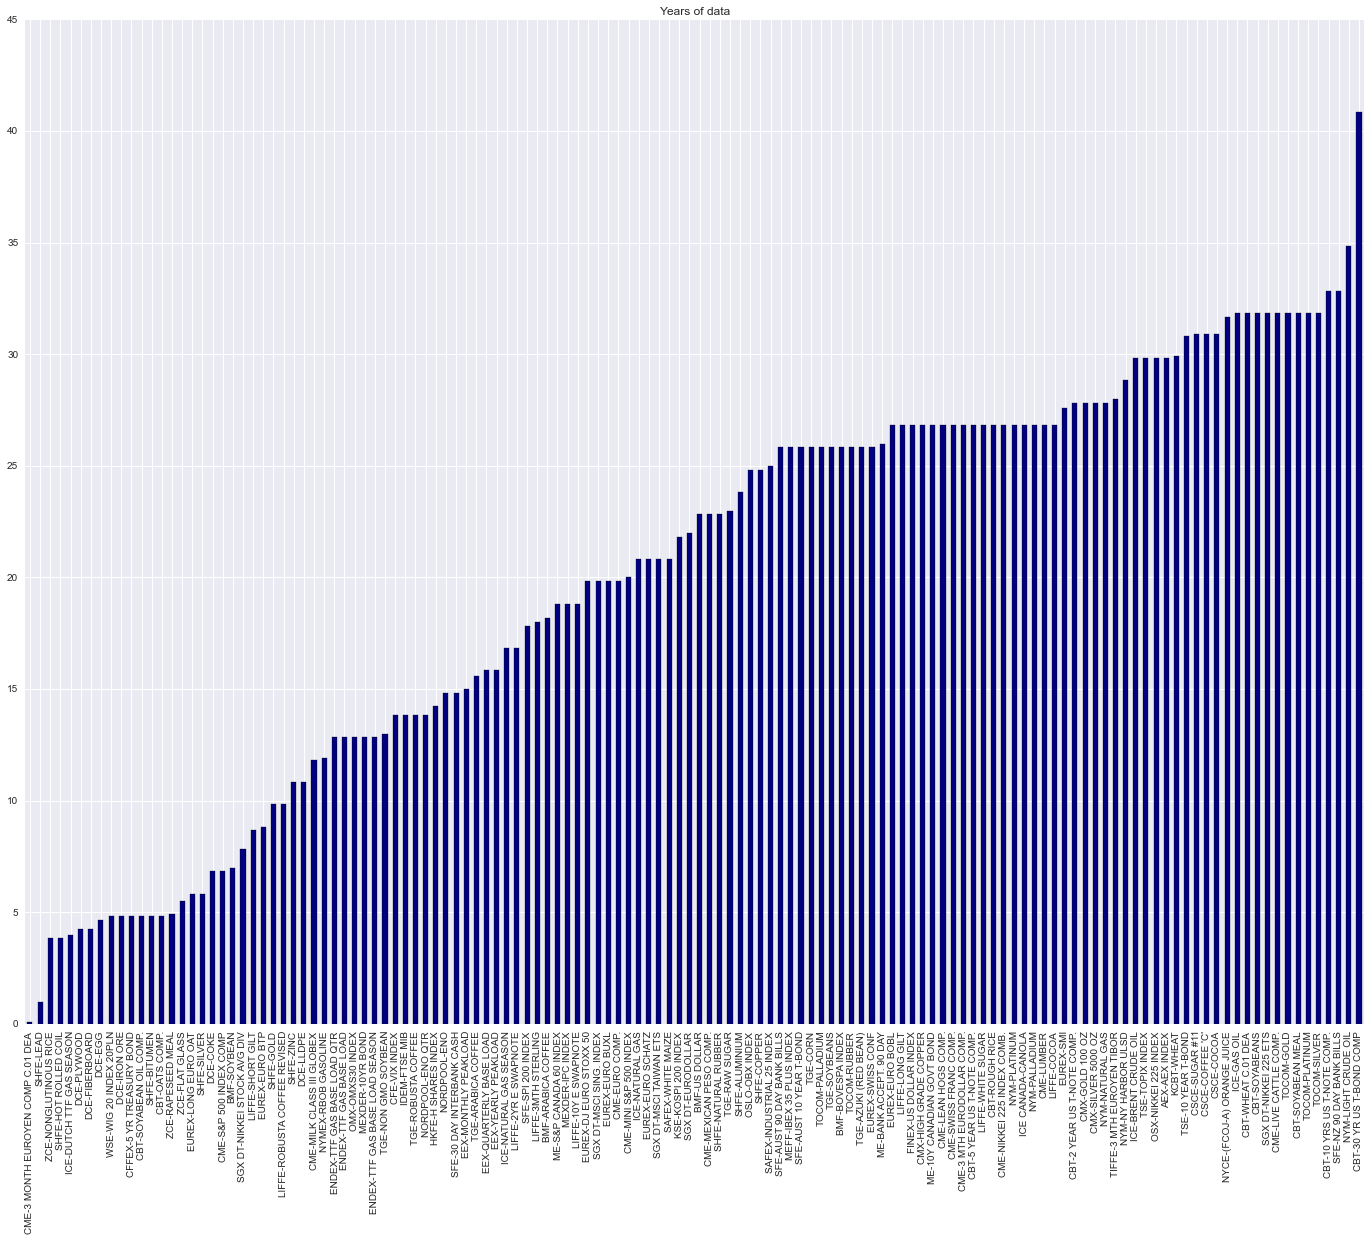

In [119]:
(price.count()/12.).sort_values().plot(colormap='jet',kind='bar',title='Years of data')